## Introduction to Data Project Phase 1
__Parham Javan 810800008<br>__
__Yaser Azad 810800003__

# Environment Setup: Install & Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import math
from scipy import stats

from scipy.stats import norm

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader, random_split
from torch.autograd import Variable
from tqdm import tqdm

RANDOM_SEED = 0
MAX_TIME_STEP = 30

### Load the Data

In [2]:
df = pd.read_csv('League of Legends competitive matches between 2015-2017 Dataset/LeagueofLegends.csv', sep=',')
df = df[df['gamelength'] >= MAX_TIME_STEP]
df.reset_index(drop = True, inplace = True)
matches = len(df)
print(f'Number of matches: {matches}')

Number of matches: 6384


In [3]:
# golddiff_df = pd.read_csv('League of Legends competitive matches between 2015-2017 Dataset/gold.csv', sep=',')
# df = df[df['gamelength'] >= MAX_TIME_STEP]
# df.reset_index(drop = True, inplace = True)
# matches = len(df)
# print(f'Number of matches: {matches}')

### Drop unnecessary columns

In [4]:
columns_to_drop = ['League', 'Type', 'blueTeamTag', 'redTeamTag', 'rResult']
df.drop(columns_to_drop, axis=1, inplace=True)

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6384 entries, 0 to 6383
Data columns (total 52 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Year              6384 non-null   int64 
 1   Season            6384 non-null   object
 2   bResult           6384 non-null   int64 
 3   gamelength        6384 non-null   int64 
 4   golddiff          6384 non-null   object
 5   goldblue          6384 non-null   object
 6   bKills            6384 non-null   object
 7   bTowers           6384 non-null   object
 8   bInhibs           6384 non-null   object
 9   bDragons          6384 non-null   object
 10  bBarons           6384 non-null   object
 11  bHeralds          6384 non-null   object
 12  goldred           6384 non-null   object
 13  rKills            6384 non-null   object
 14  rTowers           6384 non-null   object
 15  rInhibs           6384 non-null   object
 16  rDragons          6384 non-null   object
 17  rBarons       

In [6]:
# droping specific lane diffrences
df.drop(df.columns[19:53], axis=1, inplace=True)

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6384 entries, 0 to 6383
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        6384 non-null   int64 
 1   Season      6384 non-null   object
 2   bResult     6384 non-null   int64 
 3   gamelength  6384 non-null   int64 
 4   golddiff    6384 non-null   object
 5   goldblue    6384 non-null   object
 6   bKills      6384 non-null   object
 7   bTowers     6384 non-null   object
 8   bInhibs     6384 non-null   object
 9   bDragons    6384 non-null   object
 10  bBarons     6384 non-null   object
 11  bHeralds    6384 non-null   object
 12  goldred     6384 non-null   object
 13  rKills      6384 non-null   object
 14  rTowers     6384 non-null   object
 15  rInhibs     6384 non-null   object
 16  rDragons    6384 non-null   object
 17  rBarons     6384 non-null   object
 18  rHeralds    6384 non-null   object
dtypes: int64(3), object(16)
memory usage: 947.8+ KB


### Missing values

In [8]:
# Count missing values in each column
missing_values_per_column = df.isnull().sum()
print(missing_values_per_column)

Year          0
Season        0
bResult       0
gamelength    0
golddiff      0
goldblue      0
bKills        0
bTowers       0
bInhibs       0
bDragons      0
bBarons       0
bHeralds      0
goldred       0
rKills        0
rTowers       0
rInhibs       0
rDragons      0
rBarons       0
rHeralds      0
dtype: int64


no missing values

### Converting str to list and Converting team specific to diffrence

In [9]:
# After applying literal_eval, each element in the golddiff column is converted from a string to an actual list.
from ast import literal_eval
df['golddiff'] = df['golddiff'].apply(literal_eval)
df[['golddiff']].head()

,golddiff
0,"[0, 0, -14, -65, -268, -431, -488, -789, -494,..."
1,"[0, 0, -26, -18, 147, 237, -152, 18, 88, -242,..."
2,"[0, 0, 10, -60, 34, 37, 589, 1064, 1258, 913, ..."
3,"[0, 0, -15, 25, 228, -6, -243, 175, -346, 16, ..."
4,"[40, 40, 44, -36, 113, 158, -121, -191, 23, 20..."


In [10]:
# counts the items that occur up to and including MAX_TIME_STEP time step.
def count_item(items):
    count = np.zeros(MAX_TIME_STEP, dtype=np.int8)
    for timestep in range(MAX_TIME_STEP) :
        for item in items:
            if item[0] <= timestep + 1:
                count[timestep] += 1
    return count

df['bDragons'] = df['bDragons'].apply(literal_eval)
df['rDragons'] = df['rDragons'].apply(literal_eval)

df['bDragons'] = df['bDragons'].apply(count_item)
df['rDragons'] = df['rDragons'].apply(count_item)
df['dragondiff'] = df['bDragons'] - df['rDragons']

df[['dragondiff']].tail()

,dragondiff
6379,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1,..."
6380,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, -1, -1,..."
6381,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, -1, ..."
6382,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, ..."
6383,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [11]:
df['bBarons'] = df['bBarons'].apply(literal_eval)
df['rBarons'] = df['rBarons'].apply(literal_eval)

df['bBarons'] = df['bBarons'].apply(count_item)
df['rBarons'] = df['rBarons'].apply(count_item)
df['barondiff'] = df['bBarons'] - df['rBarons']

df[['barondiff']].head()

,barondiff
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [12]:
df['bHeralds'] = df['bHeralds'].apply(literal_eval)
df['rHeralds'] = df['rHeralds'].apply(literal_eval)

df['bHeralds'] = df['bHeralds'].apply(count_item)
df['rHeralds'] = df['rHeralds'].apply(count_item)
df['heralddiff'] = df['bHeralds'] - df['rHeralds']

df[['heralddiff']].head()

,heralddiff
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [13]:
df['bTowers'] = df['bTowers'].apply(literal_eval)
df['rTowers'] = df['rTowers'].apply(literal_eval)

df['bTowers'] = df['bTowers'].apply(count_item)
df['rTowers'] = df['rTowers'].apply(count_item)
df['towerdiff'] = df['bTowers'] - df['rTowers']

df[['towerdiff']].head()

,towerdiff
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -2, -2, ..."


In [14]:
df['bInhibs'] = df['bInhibs'].apply(literal_eval)
df['rInhibs'] = df['rInhibs'].apply(literal_eval)

df['bInhibs'] = df['bInhibs'].apply(count_item)
df['rInhibs'] = df['rInhibs'].apply(count_item)
df['inhibitordiff'] = df['bInhibs'] - df['rInhibs']

df[['inhibitordiff']].head()

,inhibitordiff
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [15]:
df['bKills'] = df['bKills'].apply(literal_eval)
df['rKills'] = df['rKills'].apply(literal_eval)

df['bKills'] = df['bKills'].apply(count_item)
df['rKills'] = df['rKills'].apply(count_item)
df['killdiff'] = df['bKills'] - df['rKills']

df[['killdiff']].head()

,killdiff
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, ..."
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, ..."
2,"[0, 0, 0, 0, 0, 1, 2, 2, 1, 1, 2, 2, 5, 5, 5, ..."
3,"[0, 0, 0, 0, 0, 0, 0, -1, 0, -1, -1, -1, -1, -..."
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [16]:
stats = ['golddiff','dragondiff', 'barondiff', 'heralddiff', 'towerdiff', 'inhibitordiff', 'killdiff']
x = df[stats]
y = df['bResult']

x.tail()

,golddiff,dragondiff,barondiff,heralddiff,towerdiff,inhibitordiff,killdiff
6379,"[0, -8, -187, -37, -92, -164, -229, -424, -256...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, -1, -1, -1, -3, -3, -..."
6380,"[0, 0, -18, -95, 45, -87, -117, 199, 126, 92, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, -1, -1,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, ..."
6381,"[0, 0, -86, -39, -207, -349, -60, -140, 187, -...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, -1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, -1, -2,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, -1, -1, -1, -1, -1, -2, -2, -2, -4, ..."
6382,"[0, 0, -97, 33, 351, 284, 299, 263, 403, 623, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
6383,"[0, 0, -8, -225, -36, 73, 464, 184, 1171, 1409...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, -1, -1, 0..."


In [17]:
columns_to_drop = ['goldblue', 'bKills', 'bTowers', 'bInhibs', 'bDragons', 'bBarons', 'bHeralds']
df.drop(columns_to_drop, axis=1, inplace=True)

In [18]:
columns_to_drop = ['goldred', 'rKills', 'rTowers', 'rInhibs', 'rDragons', 'rBarons', 'rHeralds']
df.drop(columns_to_drop, axis=1, inplace=True)

In [19]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6384 entries, 0 to 6383
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           6384 non-null   int64 
 1   Season         6384 non-null   object
 2   bResult        6384 non-null   int64 
 3   gamelength     6384 non-null   int64 
 4   golddiff       6384 non-null   object
 5   dragondiff     6384 non-null   object
 6   barondiff      6384 non-null   object
 7   heralddiff     6384 non-null   object
 8   towerdiff      6384 non-null   object
 9   inhibitordiff  6384 non-null   object
 10  killdiff       6384 non-null   object
dtypes: int64(3), object(8)
memory usage: 548.8+ KB
None


In [20]:
df.describe()


,Year,bResult,gamelength
count,6384.000000,6384.000000,6384.000000
mean,2016.260965,0.533365,38.985276
std,0.856199,0.498925,7.159522
min,2014.000000,0.000000,30.000000
25%,2016.000000,0.000000,34.000000
50%,2016.000000,1.000000,38.000000
75%,2017.000000,1.000000,43.000000
max,2018.000000,1.000000,95.000000


In [21]:
print(df.head(4))

   Year  Season  bResult  gamelength  \
0  2015  Spring        1          40   
1  2015  Spring        0          38   
2  2015  Spring        1          40   
3  2015  Spring        0          41   

                                            golddiff  \
0  [0, 0, -14, -65, -268, -431, -488, -789, -494,...   
1  [0, 0, -26, -18, 147, 237, -152, 18, 88, -242,...   
2  [0, 0, 10, -60, 34, 37, 589, 1064, 1258, 913, ...   
3  [0, 0, -15, 25, 228, -6, -243, 175, -346, 16, ...   

                                          dragondiff  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, -...   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, -1, -1,...   

                                           barondiff  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3  [0, 0, 0, 

### Get last item

In [22]:
# Add an integer column containing the value of the last item of each list
stats_last = []
for col in df.columns:
    if col.endswith('diff'):  # Check if column name ends with 'diff'
        stats_last.append(col + '_last')
        df[col + '_last'] = df[col].apply(lambda x: x[-1])

In [23]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6384 entries, 0 to 6383
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Year                6384 non-null   int64 
 1   Season              6384 non-null   object
 2   bResult             6384 non-null   int64 
 3   gamelength          6384 non-null   int64 
 4   golddiff            6384 non-null   object
 5   dragondiff          6384 non-null   object
 6   barondiff           6384 non-null   object
 7   heralddiff          6384 non-null   object
 8   towerdiff           6384 non-null   object
 9   inhibitordiff       6384 non-null   object
 10  killdiff            6384 non-null   object
 11  golddiff_last       6384 non-null   int64 
 12  dragondiff_last     6384 non-null   int8  
 13  barondiff_last      6384 non-null   int8  
 14  heralddiff_last     6384 non-null   int8  
 15  towerdiff_last      6384 non-null   int8  
 16  inhibitordiff_last  6384

In [24]:
print(df['golddiff'].head(4).iloc[0][-5:])

[4473, 4639, 4762, 4686, 6057]


In [25]:

print(df[stats_last].head(4))

   golddiff_last  dragondiff_last  barondiff_last  heralddiff_last  \
0           6057               -2              -1                0   
1           1165                1               1                0   
2          13915                2               0                0   
3          -4507               -3               0                0   

   towerdiff_last  inhibitordiff_last  killdiff_last  
0               3                   1              4  
1               0                   0              1  
2               5                   0              8  
3              -1                   0             -6  


In [26]:
columns_to_analyze = [stat for stat in stats_last]

# Calculate mean and standard deviation for each column
means = df[columns_to_analyze].mean()
stds = df[columns_to_analyze].std()

# Create a DataFrame to store the results
summary_df = pd.DataFrame({'Mean': means, 'Standard Deviation': stds})

# Print the summary DataFrame
print(summary_df)


                          Mean  Standard Deviation
golddiff_last       528.956767        10913.377710
dragondiff_last      -0.108709            2.127554
barondiff_last       -0.005482            0.853044
heralddiff_last       0.070959            0.765140
towerdiff_last        0.447995            3.989268
inhibitordiff_last    0.068139            0.941278
killdiff_last         0.246711            6.586110


In [27]:
df.describe()


,Year,bResult,gamelength,golddiff_last,dragondiff_last,barondiff_last,heralddiff_last,towerdiff_last,inhibitordiff_last,killdiff_last
count,6384.000000,6384.000000,6384.000000,6384.000000,6384.000000,6384.000000,6384.000000,6384.000000,6384.000000,6384.000000
mean,2016.260965,0.533365,38.985276,528.956767,-0.108709,-0.005482,0.070959,0.447995,0.068139,0.246711
std,0.856199,0.498925,7.159522,10913.377710,2.127554,0.853044,0.765140,3.989268,0.941278,6.586110
min,2014.000000,0.000000,30.000000,-25974.000000,-4.000000,-2.000000,-3.000000,-11.000000,-5.000000,-26.000000
25%,2016.000000,0.000000,34.000000,-9732.250000,-2.000000,-1.000000,0.000000,-2.000000,0.000000,-4.000000
50%,2016.000000,1.000000,38.000000,1748.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2017.000000,1.000000,43.000000,10433.500000,1.000000,1.000000,1.000000,3.000000,0.000000,5.000000
max,2018.000000,1.000000,95.000000,23772.000000,5.000000,2.000000,3.000000,11.000000,6.000000,28.000000


## Plots

### Plot histogram for _Last columns

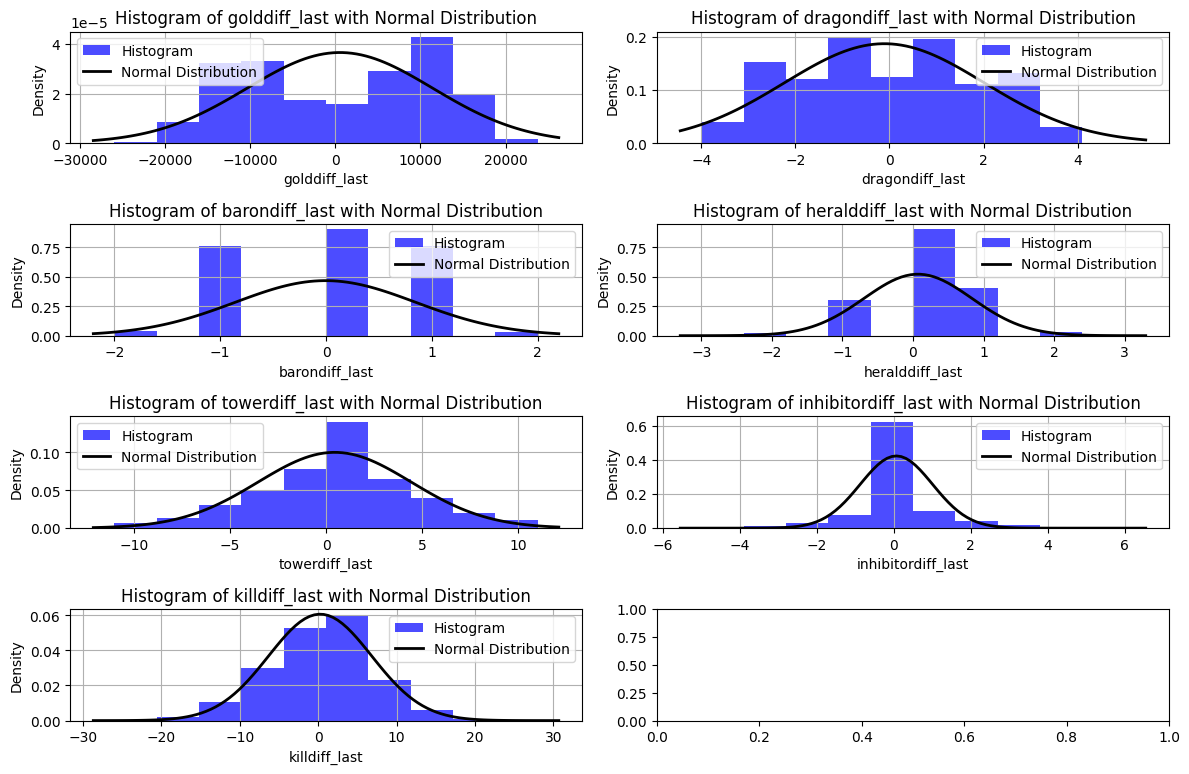

In [28]:
# Calculate the number of rows and columns for subplots
num_plots = len(stats_last)
num_rows = (num_plots // 2) + (num_plots % 2)  # Round up to the nearest integer
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Plot histogram and normal distribution for each column
for i, col in enumerate(stats_last):
    ax = axes[i]
    
    # Plot histogram
    ax.hist(df[col], bins=10, density=True, alpha=0.7, color='blue', label='Histogram')
    
    # Fit a normal distribution to the data
    mu, std = norm.fit(df[col])
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    
    # Plot normal distribution
    ax.plot(x, p, 'k', linewidth=2, label='Normal Distribution')
    
    ax.set_xlabel(col)
    ax.set_ylabel('Density')
    ax.set_title(f'Histogram of {col} with Normal Distribution')
    ax.legend()
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


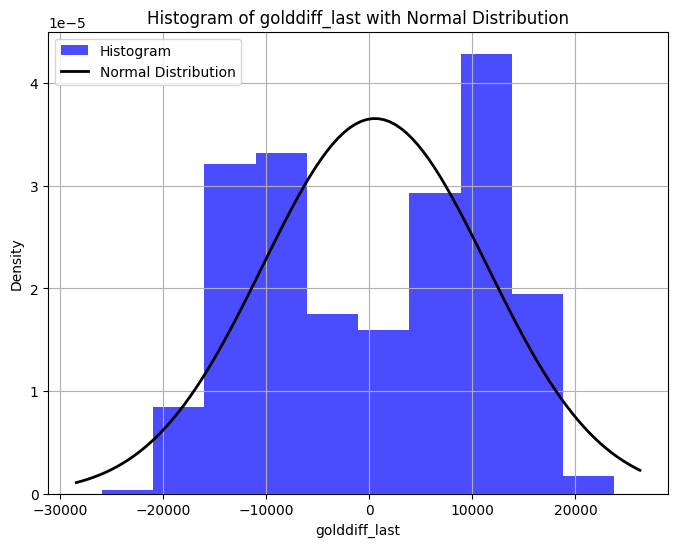

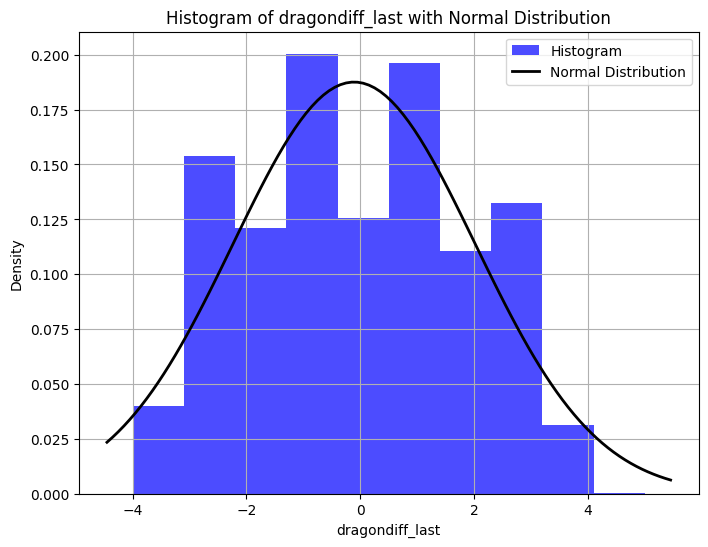

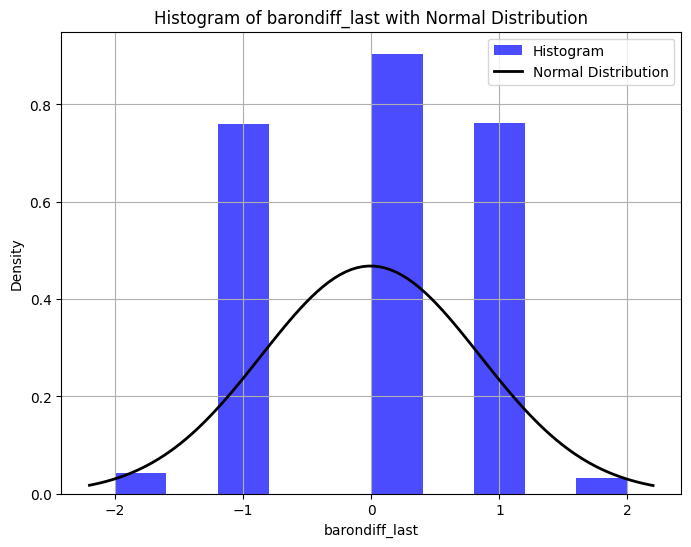

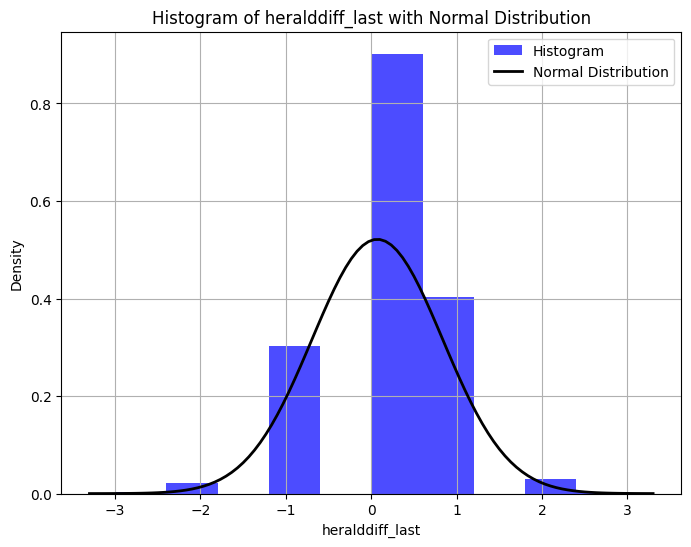

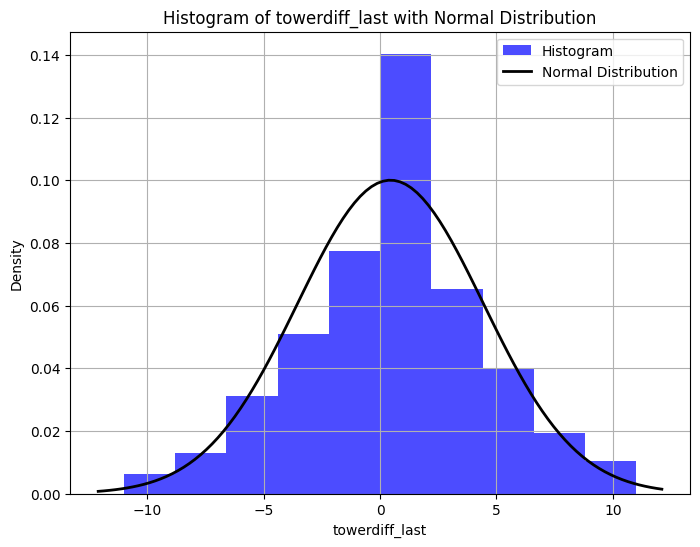

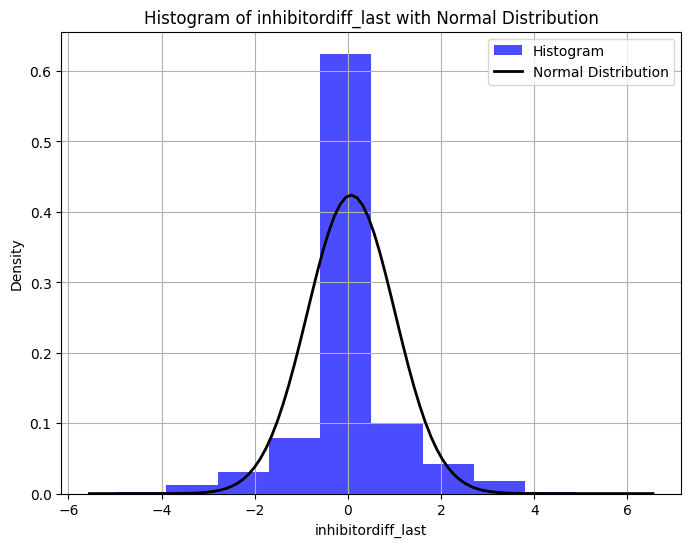

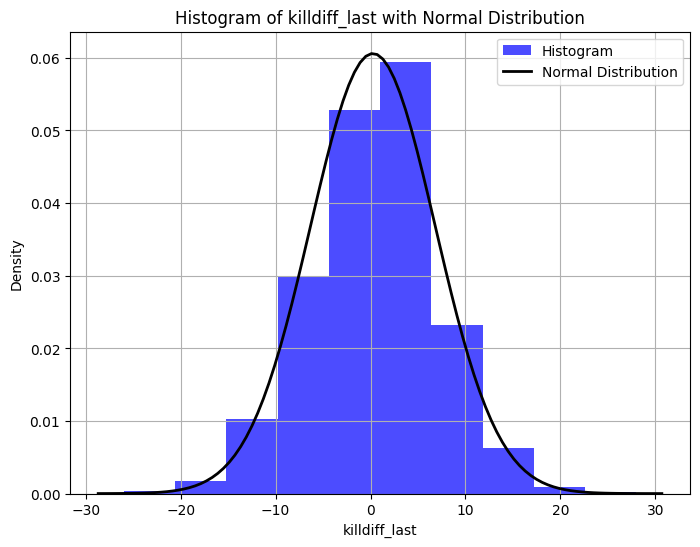

In [29]:
columns_to_plot = [stat for stat in stats_last]

for col in columns_to_plot:
    plt.figure(figsize=(8, 6))
    
    # Plot histogram
    plt.hist(df[col], bins=10, density=True, alpha=0.7, color='blue', label='Histogram')
    
    # Fit a normal distribution to the data
    mu, std = norm.fit(df[col])
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    
    # Plot normal distribution
    plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')
    
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title(f'Histogram of {col} with Normal Distribution')
    plt.legend()
    plt.grid(True)
    plt.show()

### Box Plot

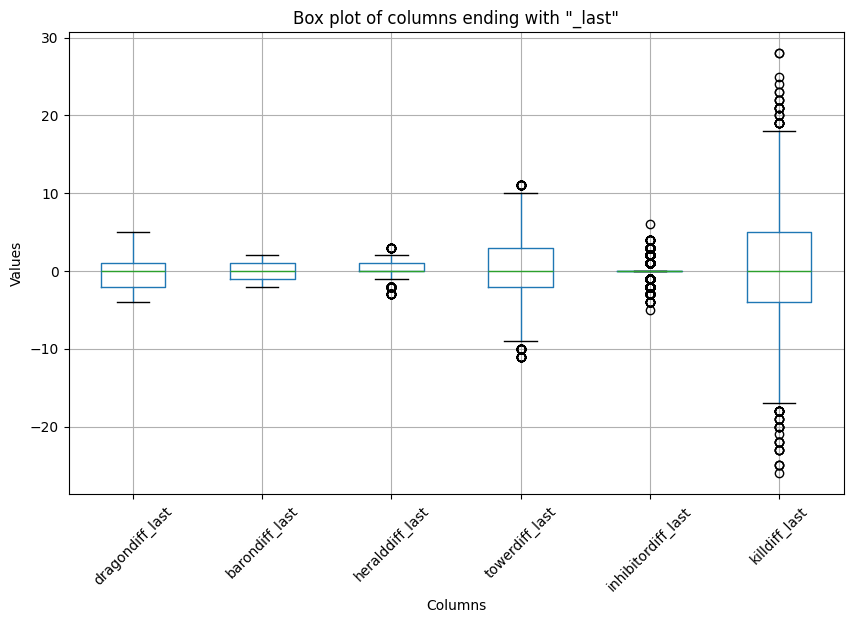

In [30]:
ex_gold = stats_last[1:]

columns_to_plot = [stat for stat in ex_gold]

# Plot box plots for each column
df[columns_to_plot].boxplot(figsize=(10, 6))
plt.title('Box plot of columns ending with "_last"')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Density Plot

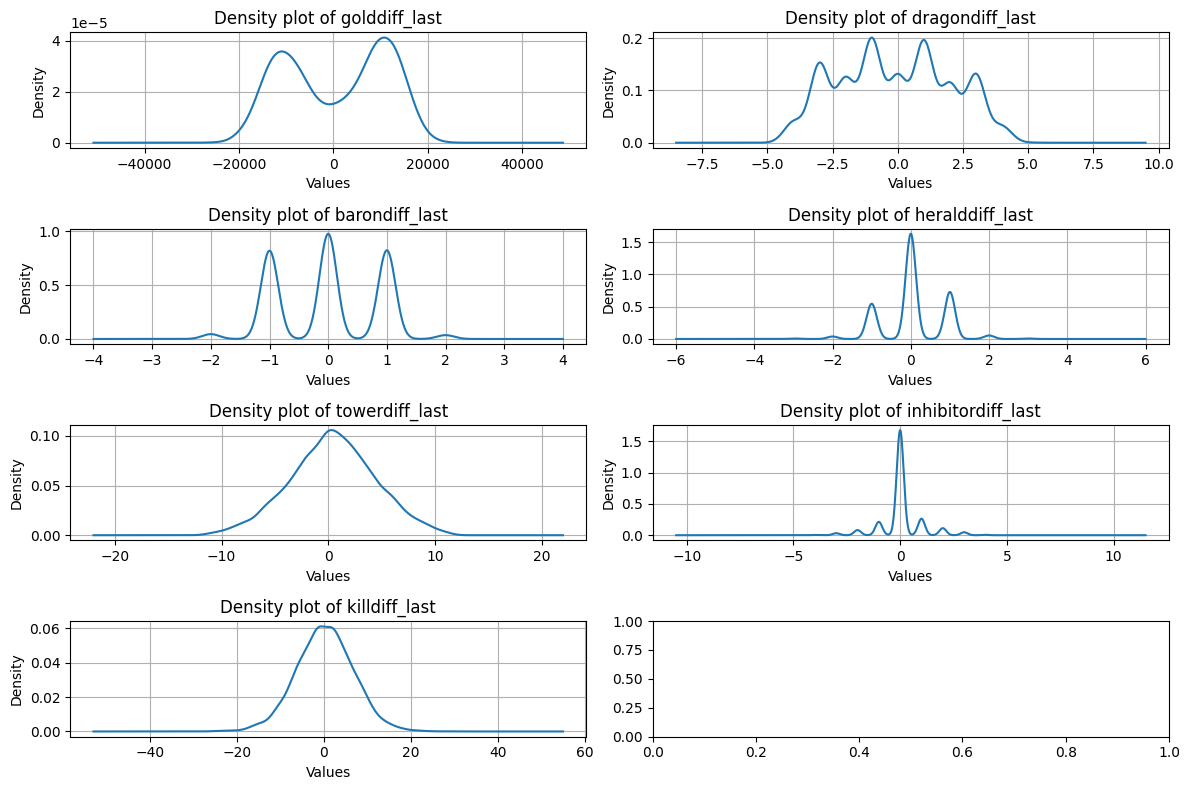

In [31]:
columns_to_plot = [stat for stat in stats_last]

# Calculate the number of rows and columns for subplots
num_plots = len(columns_to_plot)
num_rows = (num_plots // 2) + (num_plots % 2)  # Round up to the nearest integer
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Plot density plots for each column
for i, col in enumerate(columns_to_plot):
    df[col].plot.kde(ax=axes[i])
    axes[i].set_title(f'Density plot of {col}')
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Density')
    axes[i].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


In [32]:
# # Assuming df is your DataFrame and stats_last contains the suffix '_last'
# columns_to_plot = [col for col in df.columns if col.endswith('_last')]

# for col in columns_to_plot:
#     plt.figure(figsize=(8, 6))
#     df[col].plot.kde()
#     plt.title(f'Density plot of {col}')
#     plt.xlabel('Values')
#     plt.ylabel('Density')
#     plt.grid(True)
#     plt.show()


### Scatter Plot

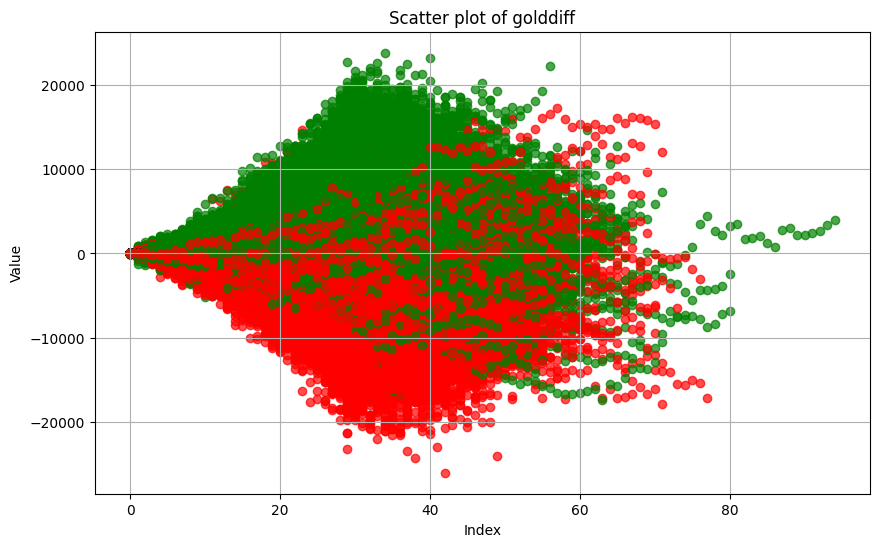

In [33]:
plt.figure(figsize=(10, 6))

# Iterate over each row
for index, row in df.iterrows():
    # Set color based on bresult value
    color = 'green' if row['bResult'] == 1 else 'red'
    
    # Scatter plot the values against their index with the selected color
    plt.scatter(range(len(row['golddiff'])), row['golddiff'], alpha=0.7, color=color)

plt.title('Scatter plot of golddiff')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()

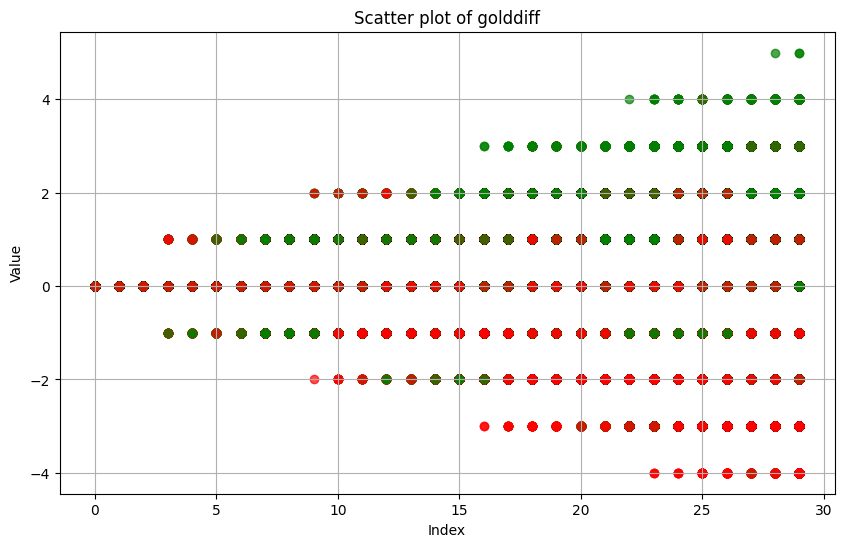

In [48]:
plt.figure(figsize=(10, 6))

# Iterate over each row
for index, row in df.iterrows():
    # Set color based on bresult value
    color = 'green' if row['bResult'] == 1 else 'red'
    
    # Scatter plot the values against their index with the selected color
    plt.scatter(range(len(row['dragondiff'])), row['dragondiff'], alpha=0.7, color=color)

plt.title('Scatter plot of dragondiff')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()

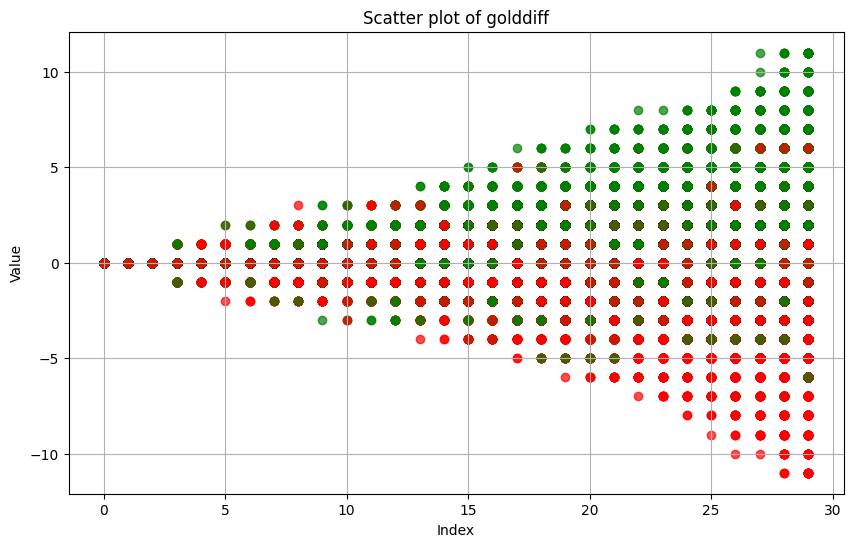

In [49]:
plt.figure(figsize=(10, 6))

# Iterate over each row
for index, row in df.iterrows():
    # Set color based on bresult value
    color = 'green' if row['bResult'] == 1 else 'red'
    
    # Scatter plot the values against their index with the selected color
    plt.scatter(range(len(row['towerdiff'])), row['towerdiff'], alpha=0.7, color=color)

plt.title('Scatter plot of towerdiff')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()

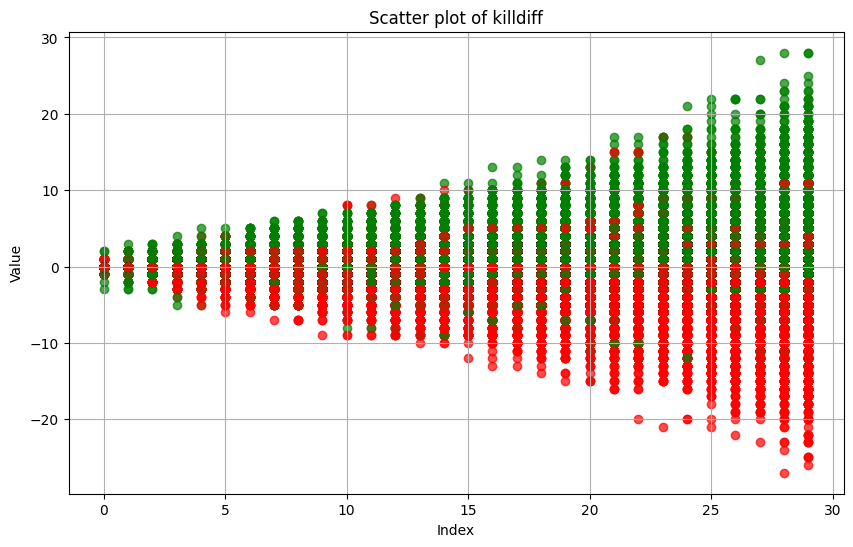

In [34]:
plt.figure(figsize=(10, 6))

# Iterate over each row
for index, row in df.iterrows():
    # Set color based on bresult value
    color = 'green' if row['bResult'] == 1 else 'red'
    
    # Scatter plot the values against their index
    plt.scatter(range(len(row['killdiff'])), row['killdiff'], alpha=0.7, color=color)

plt.title('Scatter plot of killdiff')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()


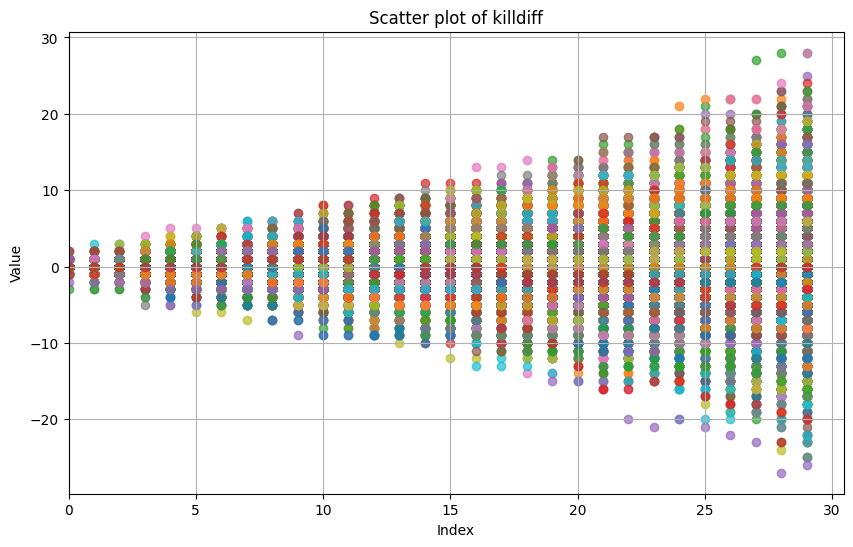

In [35]:
plt.figure(figsize=(10, 6))

# Iterate over each row
for index, row in df.iterrows():
    # Scatter plot the values against their index
    plt.scatter(range(len(row['killdiff'])), row['killdiff'], alpha=0.7)

plt.title('Scatter plot of killdiff')
plt.xlabel('Index')
plt.ylabel('Value')
plt.xlim(0, None)  # Set x-axis limit to show all values
plt.grid(True)
plt.show()


### Plot Box

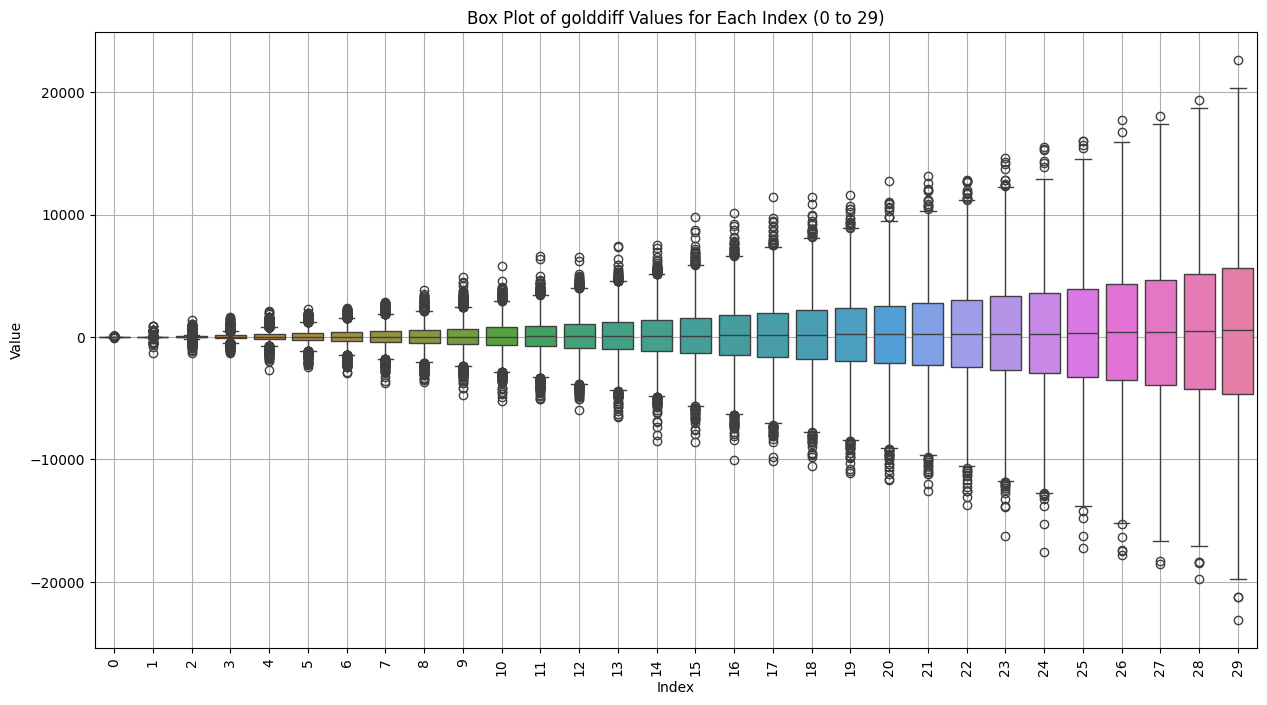

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame from the 'golddiff' lists, limited to the first 30 indices
golddiff_df = pd.DataFrame(df['golddiff'].tolist()).iloc[:, :30]

# Plot a box plot
plt.figure(figsize=(15, 8))
sns.boxplot(data=golddiff_df, orient='v')
plt.title('Box Plot of golddiff Values for Each Index (0 to 29)')
plt.xlabel('Index')
plt.ylabel('Value')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()


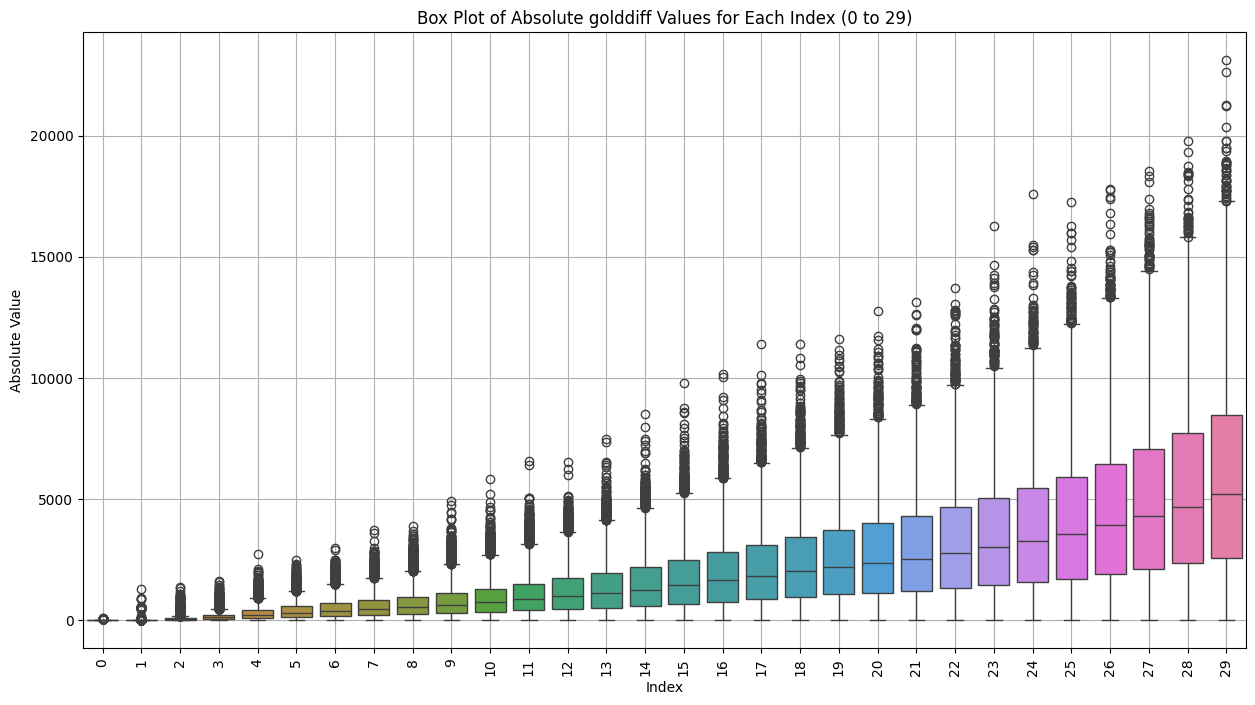

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame from the 'golddiff' lists, limited to the first 30 indices and take absolute values
golddiff_df = pd.DataFrame(df['golddiff'].tolist()).iloc[:, :30].abs()

# Plot a box plot
plt.figure(figsize=(15, 8))
sns.boxplot(data=golddiff_df, orient='v')
plt.title('Box Plot of Absolute golddiff Values for Each Index (0 to 29)')
plt.xlabel('Index')
plt.ylabel('Absolute Value')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()


### line Chart

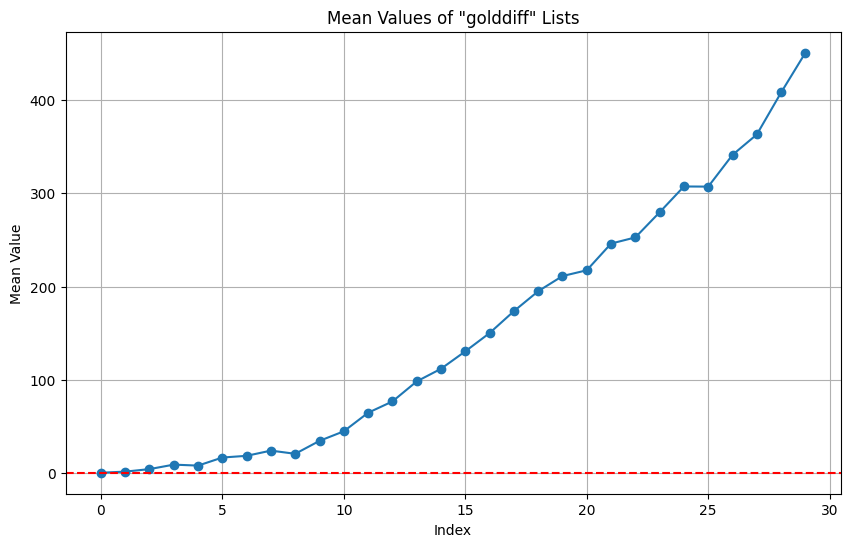

In [38]:
# Ensure all lists in 'golddiff' are of the same length
list_length = 30
# Initialize an empty list to store the mean values
mean_values = []

# Iterate over the index range (assuming all lists have the same length)
for i in range(list_length):
    # Calculate the mean value for the i-th index across all rows
    mean_value = np.mean([row[i] for row in df['golddiff']])
    mean_values.append(mean_value)

# Plot a line chart
plt.figure(figsize=(10, 6))
plt.plot(mean_values, marker='o')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.title('Mean Values of "golddiff" Lists')
plt.xlabel('Index')
plt.ylabel('Mean Value')
plt.grid(True)
plt.show()


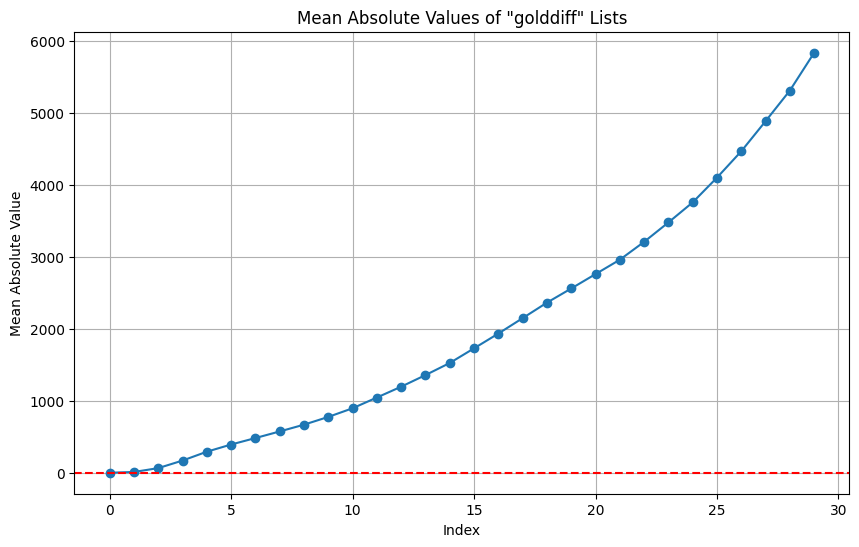

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure all lists in 'golddiff' are of the same length
list_length = 30

# Initialize an empty list to store the mean values
mean_values = []

# Iterate over the index range (assuming all lists have the same length)
for i in range(list_length):
    # Calculate the mean value for the i-th index across all rows (taking absolute values)
    mean_value = np.mean([abs(row[i]) for row in df['golddiff']])
    mean_values.append(mean_value)

# Plot a line chart
plt.figure(figsize=(10, 6))
plt.plot(mean_values, marker='o')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.title('Mean Absolute Values of "golddiff" Lists')
plt.xlabel('Index')
plt.ylabel('Mean Absolute Value')
plt.grid(True)
plt.show()


### violin plot

<Axes: xlabel='golddiff'>

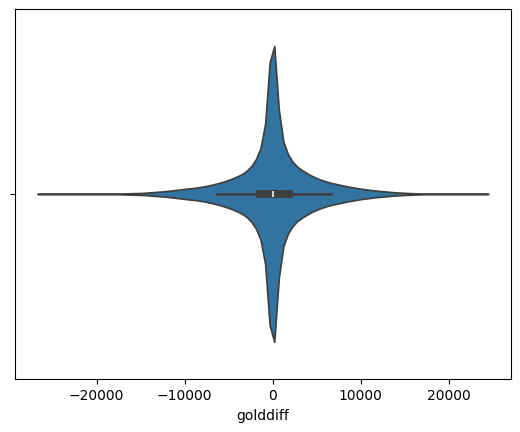

In [40]:
# Let's flatten the 'golddiff' column
flattened_golddiff = [item for sublist in df['golddiff'] for item in sublist]

# Create a DataFrame with the flattened golddiff data
df_flattened = pd.DataFrame({'golddiff': flattened_golddiff})

# Plot the violin plot
sns.violinplot(data=df_flattened, x='golddiff')


## Correlation Heatmap

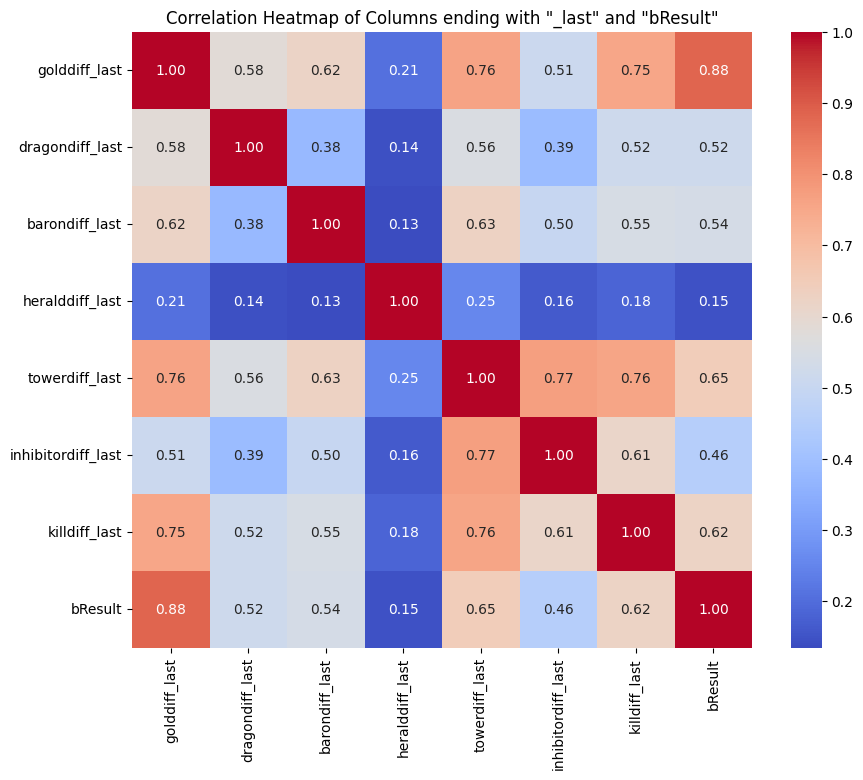

In [41]:

# Assuming df is your DataFrame and stats_last contains the suffix '_last'
columns_to_include = [stat for stat in stats_last] + ['bResult']

# Calculate the correlation matrix
correlation_matrix = df[columns_to_include].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Columns ending with "_last" and "bResult"')
plt.show()


### Normalizing Dataset

In [42]:
from sklearn.preprocessing import StandardScaler


# Initialize dictionaries for scalers and normalized data
scalers = {}
normalized_data = {}

# Initialize StandardScaler for each statistic
for stat in stats:
    scalers[stat] = StandardScaler()

    # Partial fit the scaler on each row of the statistic
    for row in df[stat]:
        scalers[stat].partial_fit(np.asarray(row).reshape(-1, 1))

    # Transform and normalize each row of the statistic
    normalized_data[stat] = [scalers[stat].transform(np.asarray(row).reshape(-1, 1)).reshape(-1) for row in df[stat]]

# Create a new DataFrame 'normaldf' 
# Specify columns to add to normaldf
columns_to_add = ['Year', 'Season', 'bResult', 'gamelength',]
normaldf = df[columns_to_add].copy()
# Add normalized data to normaldf
for stat in stats:
    normaldf[stat] = normalized_data[stat]

In [43]:
print(normaldf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6384 entries, 0 to 6383
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           6384 non-null   int64 
 1   Season         6384 non-null   object
 2   bResult        6384 non-null   int64 
 3   gamelength     6384 non-null   int64 
 4   golddiff       6384 non-null   object
 5   dragondiff     6384 non-null   object
 6   barondiff      6384 non-null   object
 7   heralddiff     6384 non-null   object
 8   towerdiff      6384 non-null   object
 9   inhibitordiff  6384 non-null   object
 10  killdiff       6384 non-null   object
dtypes: int64(3), object(8)
memory usage: 548.8+ KB
None


In [44]:
print(normaldf.tail(2))

      Year  Season  bResult  gamelength  \
6382  2018  Spring        1          35   
6383  2018  Spring        0          42   

                                               golddiff  \
6382  [-0.03239842626554006, -0.03239842626554006, -...   
6383  [-0.03239842626554006, -0.03239842626554006, -...   

                                             dragondiff  \
6382  [0.059633118863378486, 0.059633118863378486, 0...   
6383  [0.059633118863378486, 0.059633118863378486, 0...   

                                              barondiff  \
6382  [0.011537918362134211, 0.011537918362134211, 0...   
6383  [0.011537918362134211, 0.011537918362134211, 0...   

                                             heralddiff  \
6382  [-0.06603466950140649, -0.06603466950140649, -...   
6383  [-0.06603466950140649, -0.06603466950140649, -...   

                                              towerdiff  \
6382  [-0.08826986066964546, -0.08826986066964546, -...   
6383  [-0.08826986066964546, -0.08826986

In [46]:
normaldf.describe()


,Year,bResult,gamelength
count,6384.000000,6384.000000,6384.000000
mean,2016.260965,0.533365,38.985276
std,0.856199,0.498925,7.159522
min,2014.000000,0.000000,30.000000
25%,2016.000000,0.000000,34.000000
50%,2016.000000,1.000000,38.000000
75%,2017.000000,1.000000,43.000000
max,2018.000000,1.000000,95.000000


In [47]:
normaldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6384 entries, 0 to 6383
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           6384 non-null   int64 
 1   Season         6384 non-null   object
 2   bResult        6384 non-null   int64 
 3   gamelength     6384 non-null   int64 
 4   golddiff       6384 non-null   object
 5   dragondiff     6384 non-null   object
 6   barondiff      6384 non-null   object
 7   heralddiff     6384 non-null   object
 8   towerdiff      6384 non-null   object
 9   inhibitordiff  6384 non-null   object
 10  killdiff       6384 non-null   object
dtypes: int64(3), object(8)
memory usage: 548.8+ KB


# Top10 teams

In [1]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('League of Legends competitive matches between 2015-2017 Dataset/LeagueofLegends.csv')

# Create a new column 'winningTeam' to store the name of the winning team
df['winningTeam'] = df.apply(lambda row: row['blueTeamTag'] if row['bResult'] == 1 else row['redTeamTag'], axis=1)

# Count the number of wins for each team
win_counts = df['winningTeam'].value_counts()

# Get the top 10 teams with the most wins
top_10_teams = win_counts.head(10)

# Display the top 10 teams
print(top_10_teams)


winningTeam
SKT    287
TSM    207
kt     186
SSG    181
C9     178
FW     165
CLG    165
FNC    162
H2K    158
ROX    145
Name: count, dtype: int64


# Top10 player all lane

In [10]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('League of Legends competitive matches between 2015-2017 Dataset/LeagueofLegends.csv')
# List of columns to analyze
lanes = [
    'blueTop', 'blueJungle', 'blueMiddle', 'blueADC', 'blueSupport',
    'redTop', 'redJungle', 'redMiddle', 'redADC', 'redSupport'
]

# Create a dictionary to store the counts of each player in each lane
lane_player_counts = {lane: data[lane].value_counts() for lane in lanes}

# Get the top 10 players in each lane
top_10_players_per_lane = {lane: counts.head(10) for lane, counts in lane_player_counts.items()}

# Display the top 10 players for each lane
for lane, top_players in top_10_players_per_lane.items():
    print(f"Top 10 players in {lane}:")
    print(top_players)
    print()


Top 10 players in blueTop:
blueTop
Smeb          178
Ssumday       169
CuVee         167
Odoamne       149
Hauntzer      137
Huni          126
Darshan       124
Ziv           124
Vizicsacsi    120
Impact        120
Name: count, dtype: int64

Top 10 players in blueJungle:
blueJungle
Score         175
Ambition      152
Xmithie       149
Svenskeren    141
Reignover     134
Jankos        132
Karsa         128
Trick         118
Mountain      113
Spirit        112
Name: count, dtype: int64

Top 10 players in blueMiddle:
blueMiddle
Faker          177
Kuro           165
Crown          152
Bjergsen       146
Febiven        146
Ryu            146
Maple          133
Pobelter       125
PowerOfEvil    125
Huhi           123
Name: count, dtype: int64

Top 10 players in blueADC:
blueADC
Bang          195
Arrow         168
PraY          167
Sneaky        153
Rekkles       140
WildTurtle    132
Sangyoon      129
Doublelift    125
Stixxay       123
Apollo        123
Name: count, dtype: int64

Top 10 pla

# top10 of all

In [11]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('League of Legends competitive matches between 2015-2017 Dataset/LeagueofLegends.csv')

# List of columns to analyze
lanes = [
    'blueTop', 'blueJungle', 'blueMiddle', 'blueADC', 'blueSupport',
    'redTop', 'redJungle', 'redMiddle', 'redADC', 'redSupport'
]

# Combine all players from all lanes into a single series
all_players = pd.concat([data[lane] for lane in lanes])

# Count occurrences of each player
player_counts = all_players.value_counts()

# Get the top 10 players overall
top_10_players_overall = player_counts.head(10)

# Display the top 10 players overall
print("Top 10 players overall:")
print(top_10_players_overall)


Top 10 players overall:
Bang        403
Wolf        384
Faker       365
Smeb        334
Score       329
GorillA     329
Arrow       328
CuVee       324
Bjergsen    318
Ssumday     318
Name: count, dtype: int64



Number of Outliers Removed: 0

Summary Statistics:
              Year      bResult      rResult   gamelength
count  7511.000000  7511.000000  7511.000000  7511.000000
mean   2016.281321     0.543603     0.456397    36.611503
std       0.847851     0.498128     0.498128     7.274587
min    2014.000000     0.000000     0.000000    17.000000
25%    2016.000000     0.000000     0.000000    31.000000
50%    2016.000000     1.000000     0.000000    36.000000
75%    2017.000000     1.000000     1.000000    41.000000
max    2018.000000     1.000000     1.000000    58.000000


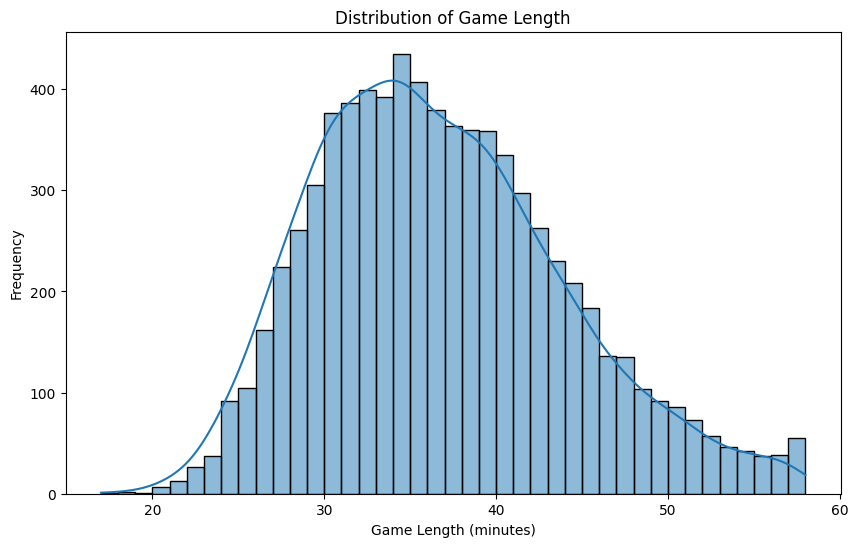

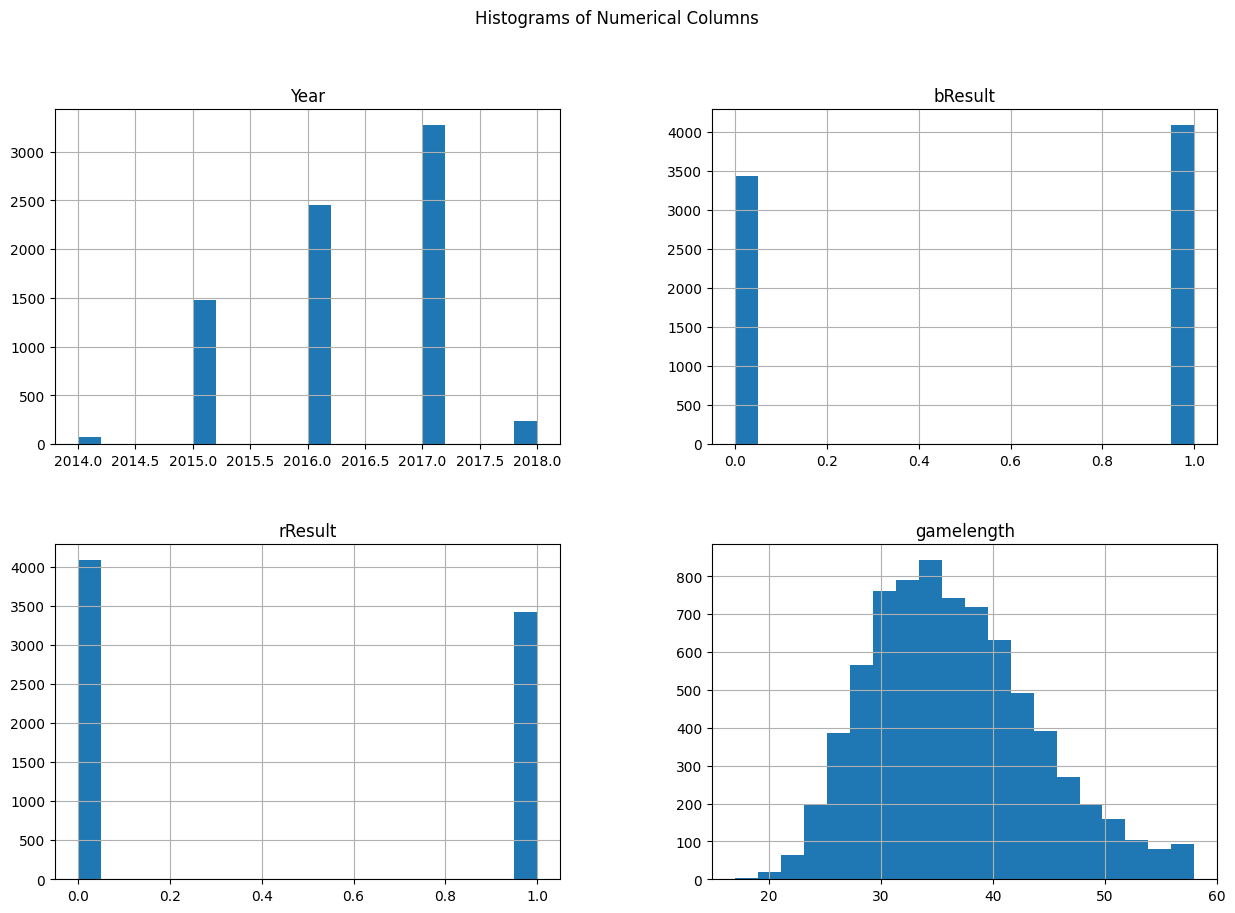

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler

# Load the CSV file
file_path = 'League of Legends competitive matches between 2015-2017 Dataset/LeagueofLegends.csv'
data = pd.read_csv(file_path)



# Assuming numerical columns for outlier detection
numerical_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
from scipy.stats import zscore
z_scores = data_cleaned[numerical_columns].apply(zscore)
outliers = (z_scores.abs() > 3).any(axis=1)
data_cleaned = data_cleaned[~outliers]

print(f"\nNumber of Outliers Removed: {outliers.sum()}")

# Descriptive Statistics
print("\nSummary Statistics:")
print(data_cleaned.describe())

plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['gamelength'], kde=True)
plt.title('Distribution of Game Length')
plt.xlabel('Game Length (minutes)')
plt.ylabel('Frequency')
plt.show()

# Visualization
data_cleaned[numerical_columns].hist(figsize=(15, 10), bins=20)
plt.suptitle('Histograms of Numerical Columns')
plt.show()






